In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/simcheol-u/Downloads/Study2_Train.csv')

In [3]:
df.set_index('ID', inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


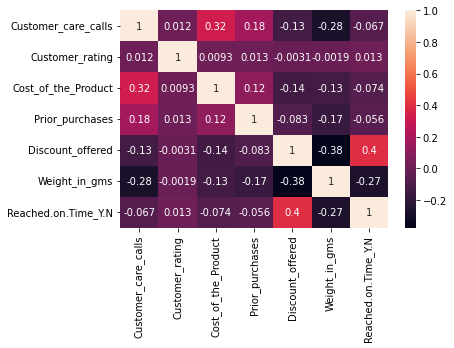

In [6]:
sns.heatmap(df.corr(), annot = True);

배송이 최대한 정시에 도착하게 하기 위해서는 어떤 변화가 있어야 할까? (평균 배송 도착 지연 확률 약 60%)
배송 도착은 어떤 특징에 영향을 받는가?

In [7]:
# 정시배송, 지연배송 데이터 분리
df_Y = df[df['Reached.on.Time_Y.N'] == 1]
df_N = df[df['Reached.on.Time_Y.N'] == 0]

# two sample t-test
# Y, N 평균이 같은가?
for col in df.select_dtypes('int').columns:
    t_value, pvalue = stats.ttest_ind(df_Y[col], df_N[col])
    if pvalue < 0.01:
        print(col)

Customer_care_calls
Cost_of_the_Product
Prior_purchases
Discount_offered
Weight_in_gms
Reached.on.Time_Y.N


정시배송, 지연배송에 대해서 고객 평가의 평균 차이는 통계적으로 유의 하지 않으나,
Customer_care_calls, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms의 평균 차이는 통계적으로 유의하다.

In [8]:
# 범주형 컬럼 two sample chi2-test
for col in df.select_dtypes('object').columns:
    obs1 = pd.crosstab(df[col], df['Reached.on.Time_Y.N'])
    chi2, pvalue, dof, expected = stats.chi2_contingency(obs1, correction = False)
    if pvalue < 0.01:
        print(col)

Product_importance


배송도착에 대해서 Product_importance는 연관있다.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Reached.on.Time_Y.N'>

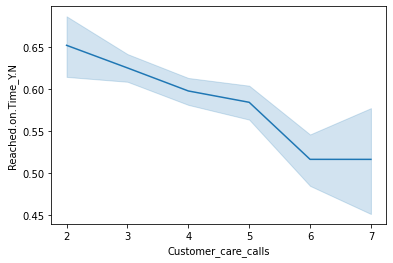

In [9]:
sns.lineplot(data=df, x='Customer_care_calls', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Reached.on.Time_Y.N'>

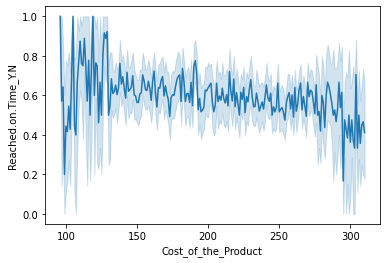

In [10]:
sns.lineplot(data=df, x='Cost_of_the_Product', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Prior_purchases', ylabel='Reached.on.Time_Y.N'>

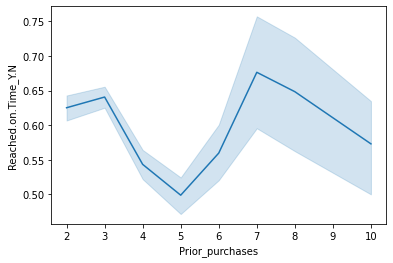

In [11]:
sns.lineplot(data=df, x='Prior_purchases', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Discount_offered', ylabel='Reached.on.Time_Y.N'>

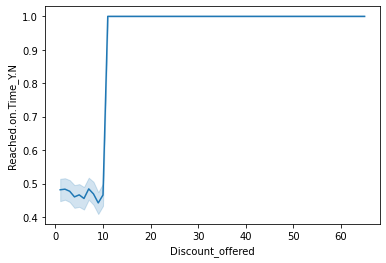

In [12]:
sns.lineplot(data=df, x='Discount_offered', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Reached.on.Time_Y.N'>

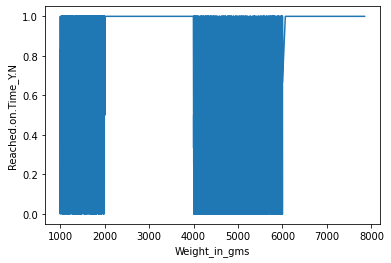

In [13]:
sns.lineplot(data=df, x='Weight_in_gms', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Product_importance', ylabel='Reached.on.Time_Y.N'>

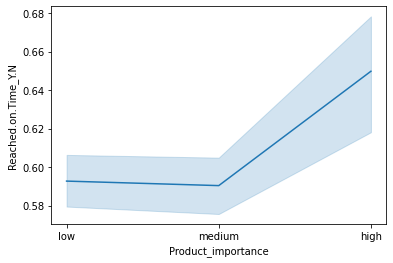

In [14]:
sns.lineplot(data=df, x='Product_importance', y='Reached.on.Time_Y.N');

In [56]:
df.loc[df['Discount_offered'] > 10, 'Reached.on.Time_Y.N'].mean()

1.0

In [81]:
df.loc[df['Discount_offered'] <= 10, 'Reached.on.Time_Y.N'].mean()

0.4688697318007663

In [58]:
for x in range(1000, 8000, 1000):
    start = x
    end = x + 1000
    df_range = df[df['Weight_in_gms'] > start]
    df_range = df_range[df_range['Weight_in_gms'] < end]
    print(df_range['Reached.on.Time_Y.N'].mean())

0.6778771983955569
1.0
1.0
0.4368489583333333
0.4249478804725504
1.0
1.0


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Discount_offered'>

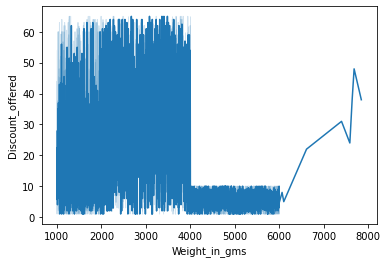

In [59]:
sns.lineplot(data=df, x='Weight_in_gms', y='Discount_offered');

<AxesSubplot:xlabel='Discount_offered', ylabel='Weight_in_gms'>

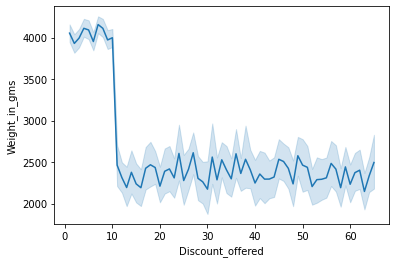

In [60]:
sns.lineplot(data=df, x='Discount_offered', y='Weight_in_gms');

In [86]:
df['Mode_of_Shipment'].value_counts().sum()

10999

In [84]:
df_range = df[df['Weight_in_gms'] > 1000]
df_range = df_range[df_range['Weight_in_gms'] < 2000]
df_range['Mode_of_Shipment'].value_counts()

3241

In [87]:
3241/ 10999

0.29466315119556324

In [85]:
df_range = df[df['Weight_in_gms'] > 2000]
df_range = df_range[df_range['Weight_in_gms'] < 4000]
df_range['Mode_of_Shipment'].value_counts().sum()

1786

In [88]:
1786/ 10999

0.16237839803618512

In [89]:
df_range = df[df['Weight_in_gms'] > 4000]
df_range = df_range[df_range['Weight_in_gms'] < 6000]
df_range['Mode_of_Shipment'].value_counts().sum()

5955

In [90]:
5955/ 10999

0.5414128557141559

In [91]:
df_range = df[df['Weight_in_gms'] > 6000]
df_range = df_range[df_range['Weight_in_gms'] < 8000]
df_range['Mode_of_Shipment'].value_counts().sum()

8

In [92]:
8/ 10999

0.0007273388489862715

'Discount_offered'가 11 이상이면 지연배송 확률이 100%
2000~4000g, 6000~7000g 상품의 배송 물량은 각각 전체의 약 16%, 0.0007% > 할인 11이상 > 지연배송 100%
1000~2000g, 4000~6000g 상품의 배송 물량은 각각 전체의 약 29%, 54%

In [95]:
df_range = df[df['Weight_in_gms'] > 1000]
df_range = df_range[df_range['Weight_in_gms'] < 2000]
df_range['Discount_offered'].mean()

16.925948781240358

In [97]:
df_range = df[df['Weight_in_gms'] > 1000]
df_range = df_range[df_range['Weight_in_gms'] < 2000]
df_range['Reached.on.Time_Y.N'].mean()

0.6778771983955569

In [94]:
df_range = df[df['Weight_in_gms'] > 4000]
df_range = df_range[df_range['Weight_in_gms'] < 6000]
df_range['Discount_offered'].mean()

5.51872376154492

In [96]:
df_range = df[df['Weight_in_gms'] > 4000]
df_range = df_range[df_range['Weight_in_gms'] < 6000]
df_range['Reached.on.Time_Y.N'].mean()

0.4310663308144416

In [102]:
df_range = df[df['Weight_in_gms'] > 1000]
df_range = df_range[df_range['Weight_in_gms'] < 2000]
df_range['Warehouse_block'].value_counts()

F    1092
A     556
B     542
C     528
D     523
Name: Warehouse_block, dtype: int64

In [103]:
df_range = df[df['Weight_in_gms'] > 2000]
df_range = df_range[df_range['Weight_in_gms'] < 4000]
df_range['Warehouse_block'].value_counts()

F    583
D    315
C    306
B    298
A    284
Name: Warehouse_block, dtype: int64

In [104]:
df_range = df[df['Weight_in_gms'] > 4000]
df_range = df_range[df_range['Weight_in_gms'] < 6000]
df_range['Warehouse_block'].value_counts()

F    1984
C     998
D     993
B     991
A     989
Name: Warehouse_block, dtype: int64

In [105]:
df_range = df[df['Weight_in_gms'] > 6000]
df_range = df_range[df_range['Weight_in_gms'] < 8000]
df_range['Warehouse_block'].value_counts()

F    5
D    1
B    1
C    1
Name: Warehouse_block, dtype: int64

In [107]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [110]:
df.loc[df['Warehouse_block'] == 'F', 'Discount_offered'].mean()

13.668030551009274

In [111]:
df.loc[df['Warehouse_block'] == 'A', 'Discount_offered'].mean()

13.222585924713584

In [112]:
df.loc[df['Warehouse_block'] == 'B', 'Discount_offered'].mean()

13.187124931805783

In [113]:
df.loc[df['Warehouse_block'] == 'C', 'Discount_offered'].mean()

13.39989088925259